## Comparison Between Magphys and Greybody 

code that fits a greybody to the mass complete sample in EN1 with a fixed redshift and then compares it to the magphys fits

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from astropy.cosmology import WMAP9 as cosmo
from astropy.table import Table,Column,join
import time

import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname('.'), '..')))

import fitIR
import fitIR.models as models
import fitIR.analyse as analyse

import pickle

import h5py
import glob

In [15]:
inputs = Table.read('../../FIR-group/Ian/FIRC/lofar/data/lofar_sed_en1.fits')
inputs[:10]

Source_Name,RA,DEC,E_RA,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,S_Code,Maj,Min,PA,E_Maj,E_Min,E_PA,DC_Maj,DC_Min,DC_PA,Isl_rms,FLAG_WORKFLOW,Prefilter,NoID,lr_fin,optRA,optDec,LGZ_Size,LGZ_Width,LGZ_PA,Assoc,Assoc_Qual,Art_prob,Blend_prob,Hostbroken_prob,Imagemissing_prob,Zoom_prob,Created,Position_from,Renamed_from,FLAG_OVERLAP_RADIO,flag_clean_radio,ID,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,flag_clean,ID_OPTICAL,ID_SPITZER,FLAG_OVERLAP,u_flux_corr,u_fluxerr_corr,u_mag_corr,u_magerr_corr,g_flux_corr,g_fluxerr_corr,g_mag_corr,g_magerr_corr,r_flux_corr,r_fluxerr_corr,r_mag_corr,r_magerr_corr,i_flux_corr,i_fluxerr_corr,i_mag_corr,i_magerr_corr,z_flux_corr,z_fluxerr_corr,z_mag_corr,z_magerr_corr,y_flux_corr,y_fluxerr_corr,y_mag_corr,y_magerr_corr,g_hsc_flux_corr,g_hsc_fluxerr_corr,g_hsc_mag_corr,g_hsc_magerr_corr,r_hsc_flux_corr,r_hsc_fluxerr_corr,r_hsc_mag_corr,r_hsc_magerr_corr,i_hsc_flux_corr,i_hsc_fluxerr_corr,i_hsc_mag_corr,i_hsc_magerr_corr,z_hsc_flux_corr,z_hsc_fluxerr_corr,z_hsc_mag_corr,z_hsc_magerr_corr,y_hsc_flux_corr,y_hsc_fluxerr_corr,y_hsc_mag_corr,y_hsc_magerr_corr,nb921_hsc_flux_corr,nb921_hsc_fluxerr_corr,nb921_hsc_mag_corr,nb921_hsc_magerr_corr,J_flux_corr,J_fluxerr_corr,J_mag_corr,J_magerr_corr,K_flux_corr,K_fluxerr_corr,K_mag_corr,K_magerr_corr,ch1_swire_flux_corr,ch1_swire_fluxerr_corr,ch1_swire_mag_corr,ch1_swire_magerr_corr,ch2_swire_flux_corr,ch2_swire_fluxerr_corr,ch2_swire_mag_corr,ch2_swire_magerr_corr,ch3_swire_flux_corr,ch3_swire_fluxerr_corr,ch3_swire_mag_corr,ch3_swire_magerr_corr,ch4_swire_flux_corr,ch4_swire_fluxerr_corr,ch4_swire_mag_corr,ch4_swire_magerr_corr,ch1_servs_flux_corr,ch1_servs_fluxerr_corr,ch1_servs_mag_corr,ch1_servs_magerr_corr,ch2_servs_flux_corr,ch2_servs_fluxerr_corr,ch2_servs_mag_corr,ch2_servs_magerr_corr,Separation,help_id,RA_HELP,DEC_HELP,EBV,CLASS_STAR,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_mips_24,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160,flag_PACS_100,flag_PACS_160,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_spire_250,flag_spire_350,flag_spire_500,Z_BEST,Z_BEST_SOURCE,Z_SPEC,z1_median,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,nfilt_eazy,nfilt_atlas,nfilt_ananna,chi_r_best,chi_r_stellar,stellar_type,AGN,optAGN,IRAGN,XrayAGN,hp_idx_11,hp_depth_cluster,tot_corr_g,tot_corr_err_g,tot_corr_r,tot_corr_err_r,tot_corr_z,tot_corr_err_z,zmodel,chi_best,Mass_median,Mass_l68,Mass_u68,SFR_median,SFR_l68,SFR_u68,Nfilts,u_rest,g_rest,r_rest,i_rest,z_rest,y_rest,J_rest,K_rest,ch1_servs_rest,ch2_servs_rest,ch1_swire_rest,ch2_swire_rest,ch3_swire_rest,ch4_swire_rest,Ldust_best,Ldust_sigma,Ldust_bayes,Ldust_03,Ldust_16,Ldust_50,Ldust_84,Ldust_98,SFR_bayes,chi2,chi2_99_flag,radio_luminosity,q_magphys,q_250,q_350,q_500,kcorr_250,kcorr_350,kcorr_500,Radio_ID,Spitzer_SN,Donley,Lacy,Stern,Messias,KI,Ch2_Ch4,Ch4_24mu,Xray,Opt_spec,AGNfrac_af,AGNfrac_af_16,AGNfrac_cg_s,AGNfrac_cg_s_16,AGNfrac_cg_f,AGNfrac_cg_f_16,Chi_sq_MpBp,Chi_sq_AfCg,AGN_final,Mass_conc,SFR_conc,Radio_excess,Radio_excess_DJS,Extended_radio,RadioAGN_final
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bytes30,float64,float64,float64,float64,float64,float64,float64,float64,bytes1,float

In [16]:
np.sum(np.isnan(inputs['F_SPIRE_250']))

8331

In [11]:
ids = inputs['Source_Name']
#nums = inputs['num']

names = ['Temperature_l','Temperature','Temperature_u','redshift_l','redshift','redshift_u','log10lir_l','log10lir','log10lir_u']

f_100 = inputs['F_PACS_100']/1E3
f_160 = inputs['F_PACS_160']/1E3
f_250 = inputs['F_SPIRE_250']/1E3
f_350 = inputs['F_SPIRE_350']/1E3
f_500 = inputs['F_SPIRE_500']/1E3

ferr_100 = (inputs['FErr_PACS_100_u']-inputs['FErr_PACS_100_l'])/2E3
ferr_160 = (inputs['FErr_PACS_160_u']-inputs['FErr_PACS_160_l'])/2E3
ferr_250 = (inputs['FErr_SPIRE_250_u']-inputs['FErr_SPIRE_250_l'])/2E3
ferr_350 = (inputs['FErr_SPIRE_350_u']-inputs['FErr_SPIRE_350_l'])/2E3
ferr_500 = (inputs['FErr_SPIRE_500_u']-inputs['FErr_SPIRE_500_l'])/2E3

lamz = np.array([100., 160., 250., 350., 500.])

In [12]:
outputs = []

for n in range(10):
    print(n)
    fluxes = np.array([f_100[n], f_160[n], f_250[n], f_350[n], f_500[n]])
    print(fluxes)
    errors = np.array([ferr_100[n], ferr_160[n], ferr_250[n], ferr_350[n], ferr_500[n]])
    print(errors)
    
    mask = ~np.isnan(fluxes)
    
    obs = fitIR.observations(lamz[mask], fluxes[mask], errors[mask], cosmo)

    source = fitIR.source(obs, mod = 'greybody') 
    
    z = inputs['Z_BEST'][n]

    source.prior_def['z'] = {'type': 'delta', 'value': z} # <---- to fix redshift
    #source.prior_def['z'] = {'type': 'uniform', 'limits': [2, 8]} 
    source.prior_def['log10LIR'] = {'type': 'uniform', 'limits': [8.,14.]}   
    source.prior_def['T'] = {'type': 'uniform', 'limits': [20.,60.]} 
    source.prior_def['emissivity'] = {'type': 'delta', 'value': 1.5} 

    output = source.fit()
    outputs.append(output)

0
[0.01818298 0.04592542 0.01689331 0.01366883 0.00367134]
[0.01496808 0.02623218 0.008556   0.0067599  0.00372222]
1
[0.01770373 0.01777029 0.03230039 0.00690681 0.00658428]
[0.01466495 0.01638033 0.00866027 0.00572309 0.00555308]
2
[nan nan nan nan nan]
[nan nan nan nan nan]
3
[0.01605283 0.01979425 0.01061945 0.00446083 0.00250345]
[0.01292873 0.01676603 0.00321478 0.00303627 0.00250891]
4
[nan nan nan nan nan]
[nan nan nan nan nan]
5
[0.00656581 0.01770669 0.01091507 0.02508542 0.01071813]
[0.00697061 0.01600949 0.00592227 0.00634994 0.00885475]
6
[0.00928771 0.01807972 0.00134034 0.00159321 0.00219878]
[0.00941937 0.01568499 0.00136188 0.00140347 0.00200372]
7
[0.03056375 0.03804663 0.01970734 0.00919977 0.00205339]
[0.0176395  0.02120463 0.00310523 0.00430476 0.00218681]
8
[0.01554128 0.02851542 0.010087   0.00425139 0.0030527 ]
[0.01185738 0.02025631 0.00298666 0.00302246 0.00278738]
9
[0.01013535 0.02289654 0.00551057 0.00632787 0.00403304]
[0.00920885 0.01752808 0.00287459 0.0

In [17]:
P

{'T': array([26.89173421, 32.2536402 , 45.00035062, 56.01325922, 58.86677736]),
 'emissivity': array([1.5, 1.5, 1.5, 1.5, 1.5]),
 'z': array([0.758, 0.758, 0.758, 0.758, 0.758]),
 'log10LIR': array([8.02071979, 8.07264691, 8.31255555, 8.64141875, 8.7802664 ])}

T [26.02515145 33.67981107 49.79193419 57.95291865 59.45003594]
emissivity [1.5 1.5 1.5 1.5 1.5]
z [2.0437 2.0437 2.0437 2.0437 2.0437]
log10LIR [8.21661908 8.64088326 9.32086318 9.68343942 9.79823012]


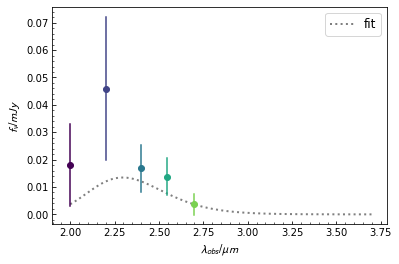

T
log10LIR


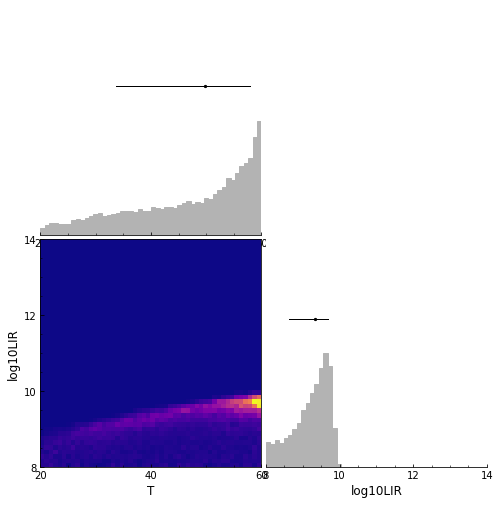

T [22.69878811 26.08352578 34.4893049  47.21550782 55.50813602]
emissivity [1.5 1.5 1.5 1.5 1.5]
z [0.6697 0.6697 0.6697 0.6697 0.6697]
log10LIR [8.07169658 8.19762296 8.51001071 8.77053119 8.88968585]


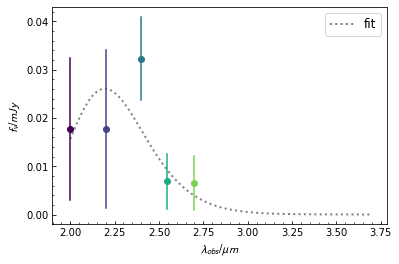

T
log10LIR


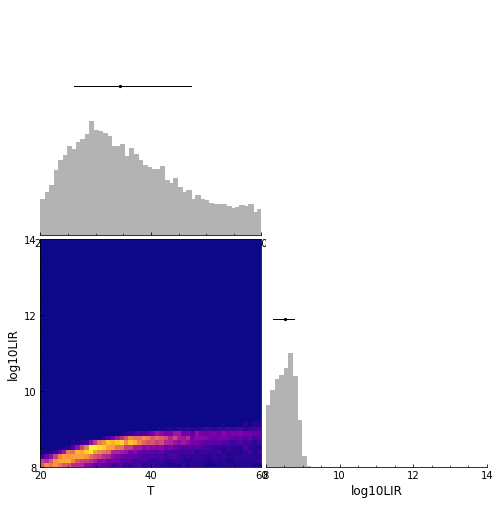

T [21.12612524 24.13755844 40.23959506 55.87979313 59.0260856 ]
emissivity [1.5 1.5 1.5 1.5 1.5]
z [1.4289 1.4289 1.4289 1.4289 1.4289]
log10LIR [ 8.18751847  8.61803643 10.986606   13.39320747 13.82229288]


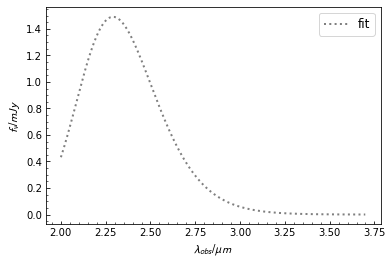

T
log10LIR


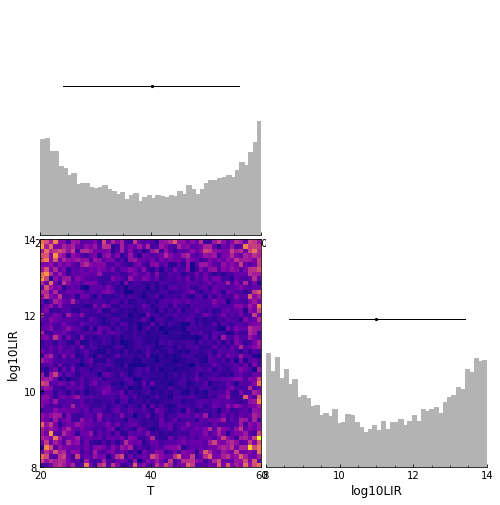

T [28.01563694 34.60979896 49.9135555  58.1788397  59.53052818]
emissivity [1.5 1.5 1.5 1.5 1.5]
z [1.7777 1.7777 1.7777 1.7777 1.7777]
log10LIR [8.33708726 8.62324766 9.04790244 9.34819048 9.45030718]


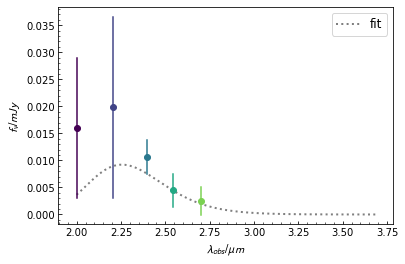

T
log10LIR


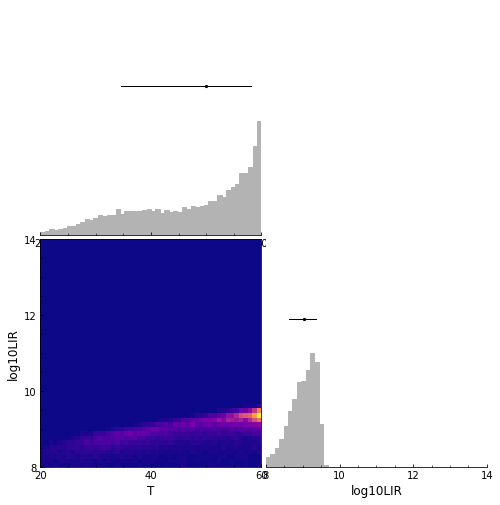

T [21.09999546 24.00044039 39.58904669 55.83415817 58.87169925]
emissivity [1.5 1.5 1.5 1.5 1.5]
z [3.696 3.696 3.696 3.696 3.696]
log10LIR [ 8.15535829  8.63437071 11.02228679 13.36476406 13.83171231]


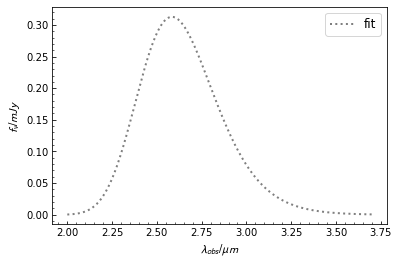

T
log10LIR


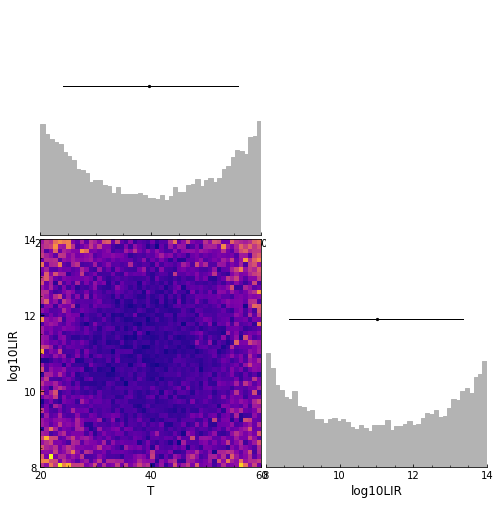

T [20.42719584 21.52225575 28.04557242 42.10289529 50.97478756]
emissivity [1.5 1.5 1.5 1.5 1.5]
z [1.1778 1.1778 1.1778 1.1778 1.1778]
log10LIR [8.25908948 8.46972295 8.72387082 8.96379986 9.09385427]


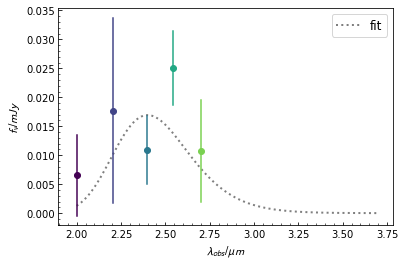

T
log10LIR


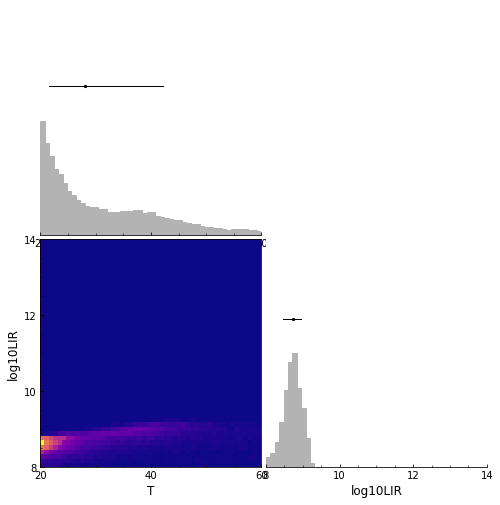

T [21.56708584 25.92317228 45.766151   57.05593465 59.20724744]
emissivity [1.5 1.5 1.5 1.5 1.5]
z [1.9892 1.9892 1.9892 1.9892 1.9892]
log10LIR [8.02155642 8.07361054 8.31972831 8.67698659 8.8573882 ]


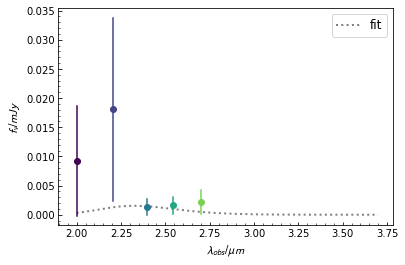

T
log10LIR


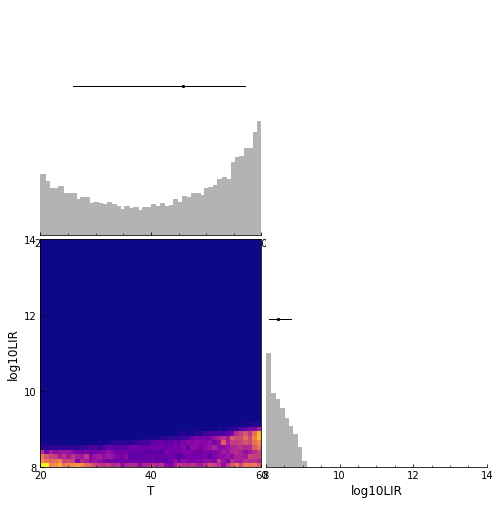

T [42.6302585  44.31680739 49.07440011 55.36629129 58.33259318]
emissivity [1.5 1.5 1.5 1.5 1.5]
z [0.1896 0.1896 0.1896 0.1896 0.1896]
log10LIR [8.00257465 8.00991059 8.05683471 8.18325473 8.2588465 ]


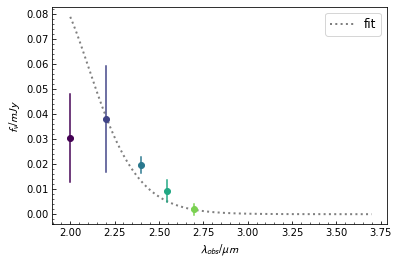

T
log10LIR


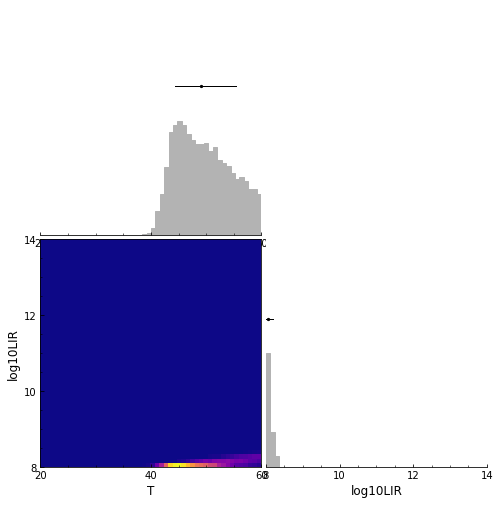

T [42.19991575 45.14985245 52.94217623 58.42166171 59.57540838]
emissivity [1.5 1.5 1.5 1.5 1.5]
z [0.2688 0.2688 0.2688 0.2688 0.2688]
log10LIR [8.0028022  8.0110563  8.06077573 8.20100653 8.28209082]


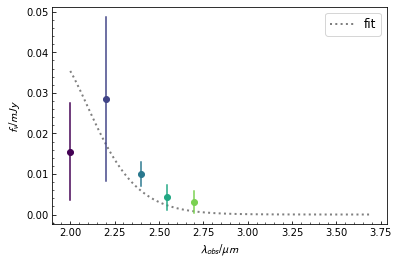

T
log10LIR


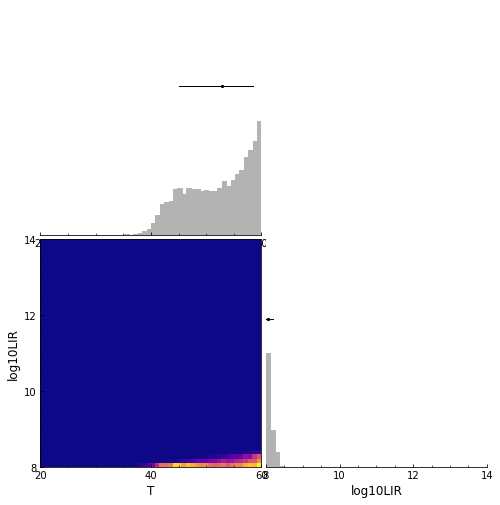

T [26.89173421 32.2536402  45.00035062 56.01325922 58.86677736]
emissivity [1.5 1.5 1.5 1.5 1.5]
z [0.758 0.758 0.758 0.758 0.758]
log10LIR [8.02071979 8.07264691 8.31255555 8.64141875 8.7802664 ]


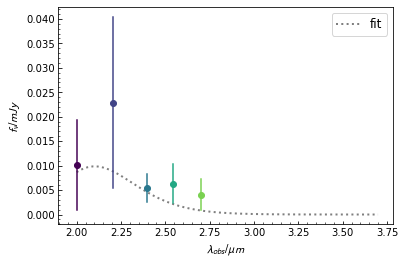

T
log10LIR


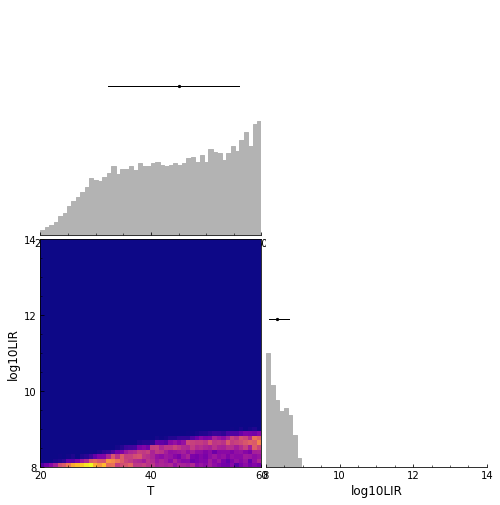

In [13]:
for source in outputs:
    a = analyse.analyser(source)

    P = a.P() # returns 5th, 16th, 50th, 84th, 95th percentile 
    for p in P.keys(): print(p, P[p])

    a.sed_plot()
    a.triangle_plot()

T [22.17970237 27.35386152 42.75234107 55.19383807 58.58486955]
emissivity [1.5 1.5 1.5 1.5 1.5]
z [1.23826317 2.12447815 4.52249411 6.26284612 6.7562589 ]
log10LIR [ 8.48078307  9.5982185  12.11137944 12.89207219 13.10588289]


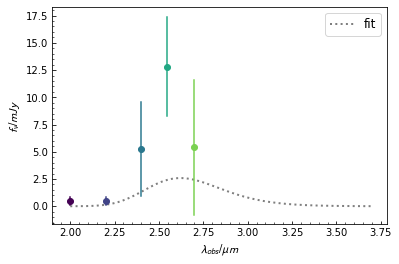

T
z
log10LIR


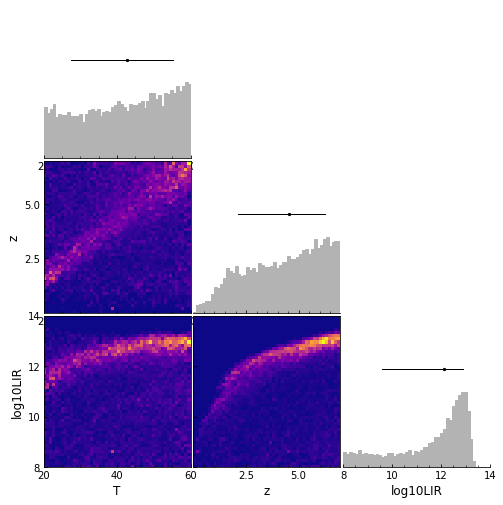

T [21.76064418 26.02538375 41.45665421 55.5542356  58.62940279]
emissivity [1.5 1.5 1.5 1.5 1.5]
z [1.10940198 1.80416265 4.23632348 6.24180972 6.74930598]
log10LIR [ 8.21918703  8.70498043 10.53415439 11.93400729 12.39087633]


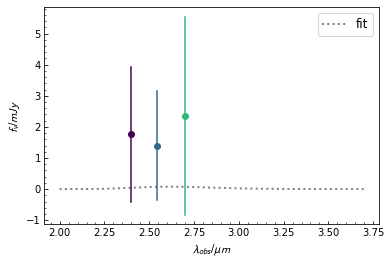

T
z
log10LIR


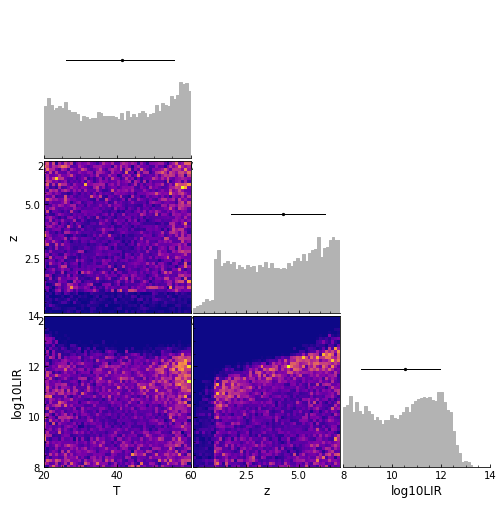

In [48]:
for source in outputs:
    a = analyse.analyser(source)

    P = a.P() # returns 5th, 16th, 50th, 84th, 95th percentile 
    for p in P.keys(): print(p, P[p])

    a.sed_plot()
    a.triangle_plot()

In [41]:
Table.read('../data/greybody_input_EN1.fits')

help_id,num,f_pacs_green,ferr_pacs_green,f_pacs_red,ferr_pacs_red,f_spire_250,ferr_spire_250,f_spire_350,ferr_spire_350,f_spire_500,ferr_spire_500
,,mJy,,mJy,,,,,,,
bytes1728,int64,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64
HELP_J155620.810+545113.308,2482323,nan,nan,nan,nan,20906.186999999998,3980.425000000003,26584.743,4480.207000000002,28536.203,5316.896000000001
HELP_J155622.752+545007.875,2629662,nan,nan,nan,nan,2092.5143,2675.7252,2062.2246,2575.2471,7125.304,4911.686
HELP_J155628.426+544936.570,2574853,nan,nan,nan,nan,57610.979999999996,3814.3070000000007,51566.753,4147.212999999996,35905.814999999995,4875.199999999993
HELP_J155628.601+545524.359,2699486,nan,nan,nan,nan,21767.074999999997,3945.0099999999984,28908.111999999997,4224.557999999997,29014.214,4922.216
HELP_J155631.071+545619.623,2469759,nan,nan,nan,nan,1423.2975999999999,1905.3827,975.4652,1316.3593999999998,3797.5717000000004,3478.171799999999
HELP_J155633.127+545753.634,2693692,nan,nan,nan,nan,5972.5614,4145.5055999999995,1523.9955,2294.7405,3110.4877,3816.1828999999993
HELP_J155633.669+544934.581,2577169,nan,nan,nan,nan,6786.080400000001,3455.5105999999996,2970.7122,2679.929800000001,2199.3911000000003,2840.5903000000003
HELP_J155633.728+545043.498,2630850,nan,nan,nan,nan,2945.7743,3704.1513999999997,2509.47,3254.6563,2519.6002000000003,3086.3507999999997
